In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Veri seti: King County House Sales Dataset
# Kaggle'dan indirebilirsiniz: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
# Colab kullanıyorsanız Drive'a yükleyip path'i güncelleyin.
# Yerel ortamda çalıştırıyorsanız: df = pd.read_csv('kc_house_data.csv')
df = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


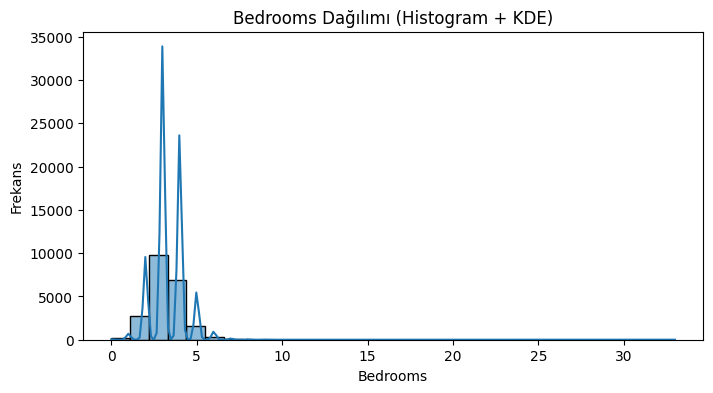

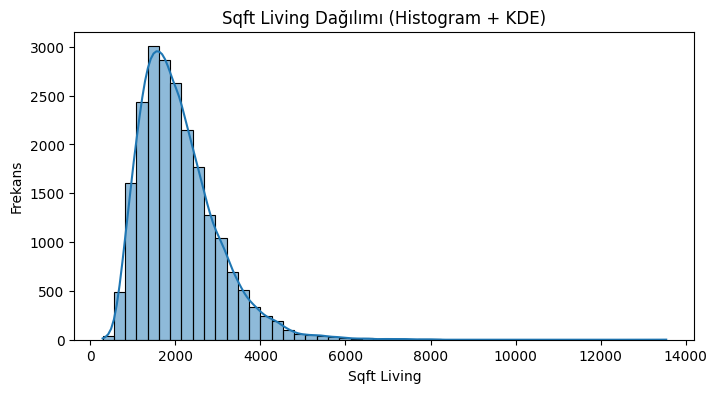

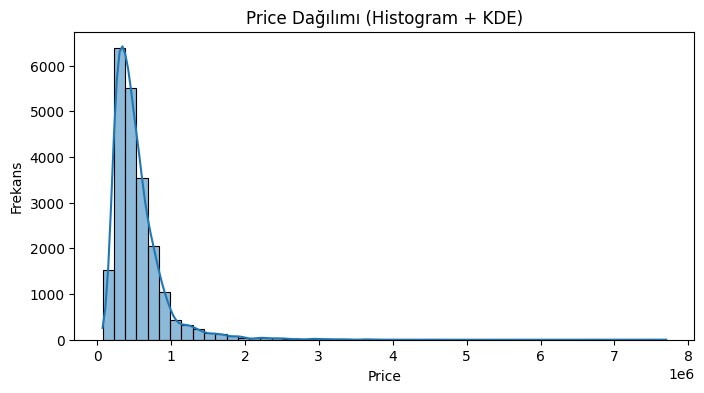

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['bedrooms'], kde=True, bins=30)
plt.title('Bedrooms Dağılımı (Histogram + KDE)')
plt.xlabel('Bedrooms')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['sqft_living'], kde=True, bins=50)
plt.title('Sqft Living Dağılımı (Histogram + KDE)')
plt.xlabel('Sqft Living')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Dağılımı (Histogram + KDE)')
plt.xlabel('Price')
plt.ylabel('Frekans')
plt.show()

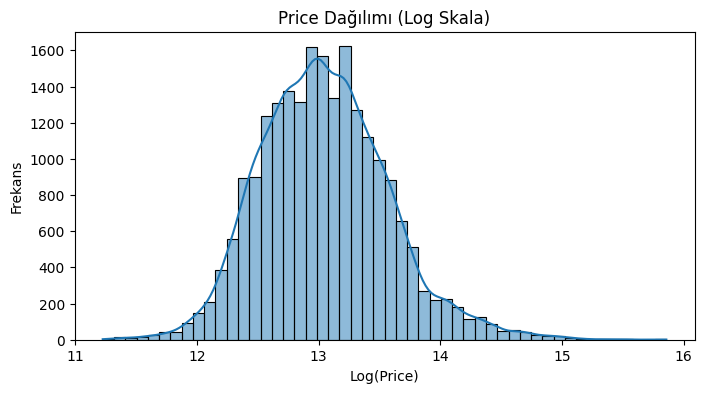

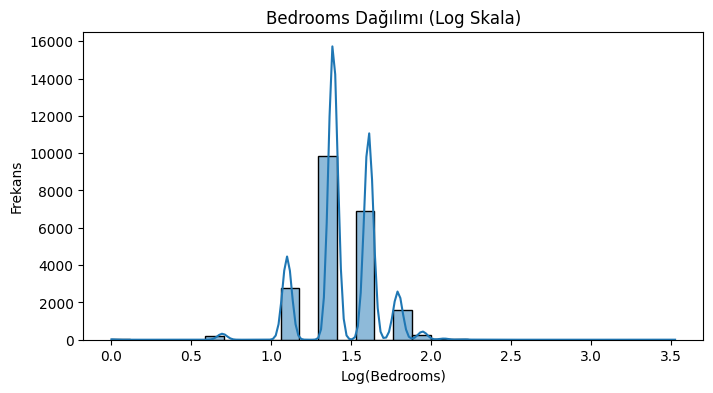

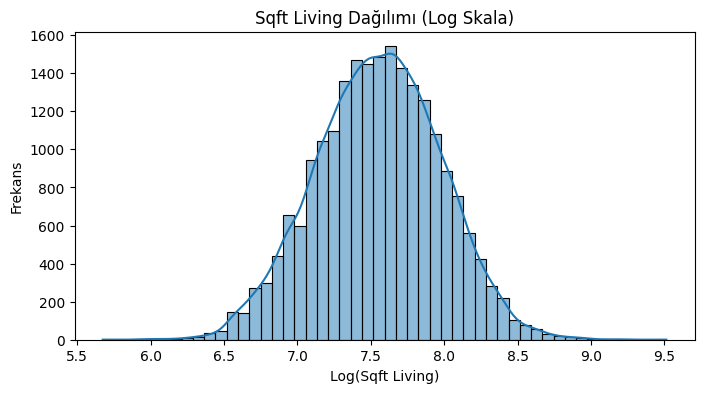

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['price']), kde=True, bins=50)
plt.title('Price Dağılımı (Log Skala)')
plt.xlabel('Log(Price)')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['bedrooms']), kde=True, bins=30)
plt.title('Bedrooms Dağılımı (Log Skala)')
plt.xlabel('Log(Bedrooms)')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['sqft_living']), kde=True, bins=50)
plt.title('Sqft Living Dağılımı (Log Skala)')
plt.xlabel('Log(Sqft Living)')
plt.ylabel('Frekans')
plt.show()

#Aykırı Değerler İle Model Eğitimi

In [ ]:
X = df.drop(['id', 'date', 'price'], axis=1)
y = df['price']

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitimi
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Skoru (Aykırı değerlerle): {r2:.4f}")


R² Skoru (Aykırı değerlerle): 0.7012


#Aykırı Değerlerin Temizlenmesi

In [ ]:
# Bedrooms > 10 veya sqft_living > 10000 veya price > 1e7 gibi aşırı uçlar temizlenir
df_cleaned = df[(df['bedrooms'] <= 10) &
                (df['sqft_living'] <= 10000) &
                (df['price'] <= 1e7)]

# Özellik ve hedef ayrımı
X_cleaned = df_cleaned.drop(['id', 'date', 'price'], axis=1)
y_cleaned = df_cleaned['price']

# Eğitim ve test seti
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Model eğitimi
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_c, y_train_c)

# Tahmin
y_pred_c = model_cleaned.predict(X_test_c)

# R² skoru hesaplama
r2_c = r2_score(y_test_c, y_pred_c)

# Sonucu yazdır
print(f"R² Skoru (Aykırı değerler temizlendikten sonra): {r2_c:.4f}")


R² Skoru (Aykırı değerler temizlendikten sonra): 0.6922


In [ ]:
# Aykırı değerleri daha sıkı filtreleme
df_cleaned = df[(df['bedrooms'] <= 8) &
                (df['sqft_living'] <= 8000) &
                (df['price'] <= 5_000_000)]

# Özellik ve hedef ayrımı
X_cleaned = df_cleaned.drop(['id', 'date', 'price'], axis=1)
y_cleaned = df_cleaned['price']

# Eğitim ve test seti
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Model eğitimi
from sklearn.linear_model import LinearRegression
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_c, y_train_c)

# Tahmin
y_pred_c = model_cleaned.predict(X_test_c)

# R² skoru hesaplama
from sklearn.metrics import r2_score
r2_c = r2_score(y_test_c, y_pred_c)

print(f"R² Skoru (Sıkı aykırı değer filtreleri sonrası): {r2_c:.4f}")


R² Skoru (Sıkı aykırı değer filtreleri sonrası): 0.7013


In [ ]:
# 1. Aykırı değerlerle (ham veri)
X = df.drop(['id', 'date', 'price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
mae_all = mean_absolute_error(y_test, y_pred_all)

# 2. İlk temizlik (bedrooms <= 10, sqft_living <= 10000, price <= 1e7)
df_cleaned_69 = df[(df['bedrooms'] <= 10) &
                   (df['sqft_living'] <= 10000) &
                   (df['price'] <= 1e7)]
X_c69 = df_cleaned_69.drop(['id', 'date', 'price'], axis=1)
y_c69 = df_cleaned_69['price']
X_train_c69, X_test_c69, y_train_c69, y_test_c69 = train_test_split(X_c69, y_c69, test_size=0.2, random_state=42)
model_c69 = LinearRegression()
model_c69.fit(X_train_c69, y_train_c69)
y_pred_c69 = model_c69.predict(X_test_c69)
rmse_c69 = np.sqrt(mean_squared_error(y_test_c69, y_pred_c69))
mae_c69 = mean_absolute_error(y_test_c69, y_pred_c69)

# 3. Sıkı temizlik (bedrooms <= 8, sqft_living <= 8000, price <= 5_000_000)
df_filtered = df[(df['bedrooms'] <= 8) &
                 (df['sqft_living'] <= 8000) &
                 (df['price'] <= 5_000_000)]
X_f = df_filtered.drop(['id', 'date', 'price'], axis=1)
y_f = df_filtered['price']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)
model_f = LinearRegression()
model_f.fit(X_train_f, y_train_f)
y_pred_f = model_f.predict(X_test_f)
rmse_f = np.sqrt(mean_squared_error(y_test_f, y_pred_f))
mae_f = mean_absolute_error(y_test_f, y_pred_f)

# Sonuçları yazdır
print("1) Aykırı Değerlerle:")
print(f"   RMSE: {rmse_all:.2f}")
print(f"   MAE : {mae_all:.2f}")

print("\n2) İlk Temizlik (<=10 odalı, 10k alan, 10M fiyat):")
print(f"   RMSE: {rmse_c69:.2f}")
print(f"   MAE : {mae_c69:.2f}")

print("\n3) Sıkı Temizlik (<=8 odalı, 8k alan, 5M fiyat):")
print(f"   RMSE: {rmse_f:.2f}")
print(f"   MAE : {mae_f:.2f}")

1) Aykırı Değerlerle:
   RMSE: 212539.52
   MAE : 127493.34

2) İlk Temizlik (<=10 odalı, 10k alan, 10M fiyat):
   RMSE: 204078.82
   MAE : 124563.98

3) Sıkı Temizlik (<=8 odalı, 8k alan, 5M fiyat):
   RMSE: 189902.95
   MAE : 122404.09


#Değerlendirme
**Aykırı Değerlerle**

RMSE: 212,539

MAE : 127,493

Aykırı (uç) fiyatlar modele zarar veriyor. Ortalama hata 127 bin $, bazı hatalar 200 bini aşıyor. Bu, modelin çok sapmasına neden olur.

**İlk Temizlik** (<=10 oda, 10k ft², 10M $):

RMSE: 204,078

MAE : 124,563

Aykırı değerleri çıkardığımızda hata azalıyor. Model biraz daha dengeli hale gelmiş. Büyük sapmalar biraz azalmış.

**Sıkı Temizlik** (<=8 oda, 8k ft², 5M $):

RMSE: 189,903

MAE : 122,404

Daha da sıkı temizlik, yani verideki uç değerleri iyice filtrelemek, tahmin hatasını daha da azaltıyor. Model daha istikrarlı hale geliyor.
Büyük fiyat sıçramaları çıkınca model daha ortalamaya yakın sonuçlar veriyor.



**Modelin performansının düşme nedenleri neler olabilir?**

**1-**R² skoru, toplam varyansın ne kadarını modelin açıkladığını ölçer.

Aykırı değerler genellikle büyük varyans yaratır.
Model bu uç değerleri takip edebiliyorsa, yüksek varyans = yüksek açıklama oranı = yüksek R² gibi görünür.

Ama bu durum çoğu zaman overfitting'e (ezberleme) işaret eder.

Örnek:
Ev fiyatları genelde 100k–1M arası değişirken, birden 10M’lik birkaç ev varsa, bu evleri tahmin etmek R²'yi yükseltir.
Ama bu gerçekte "doğruluk" değil, varyansın büyüklüğünden kaynaklanan sahte başarıdır.

**2-**Aykırı değerler çıkarıldığında veri daha homojen hale gelir.

Bu durumda modelin "farklılıkları açıklama" potansiyeli de azalır.

**3-**Veri hacmi azaldığı için olabilir.Daha az veri, daha az öğrenme → bu da skorları etkileyebilir.
